In [1]:
import kornia as K
import numpy as np
from courtvision.vis import plot_coords, plot_3d_lines, plot_3d_points
from courtvision.geometry import (
    PadelCourt,
    corners_world,
    corners_world_3d,
    convert_corners_to_vec,
    convert_corners_to_lines,
)

/Users/benjamindecharmoy/projects/courtvision/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
corners_world_3d
# (*PadelCourt.center_line_n[0].flatten().tolist(), 0.0)

{'a_front_left': (0.0, 20.0, 0.0),
 'b_front_right': (10.0, 20.0, 0.0),
 'c_back_left': (0.0, 0.0, 0.0),
 'd_back_right': (10.0, 0.0, 0.0),
 'e_left_near_serve_line': (0.0, 18.0, 0.0),
 'f_right_near_serve_line': (10.0, 18.0, 0.0),
 'g_left_far_serve_line': (0.0, 2.0, 0.0),
 'h_right_far_serve_line': (10.0, 2.0, 0.0),
 'i_center_line_left': (5, 20, 0.0),
 'j_net_line_left': (0, 10, 0.0),
 'i_center_line_rigth': (5, 0, 0.0),
 'j_net_line_right': (10, 10, 0.0)}

In [10]:
from collections import defaultdict
from functools import partial
import numpy as np


def convert_corners_to_vec(corners: dict):
    vec_of_positions = defaultdict(partial(np.ndarray, 0))
    for _, x_y_z in corners.items():
        for axis, value in zip(["x", "y", "z"], x_y_z, strict=False):
            vec_of_positions[axis] = np.append(vec_of_positions[axis], value)
    return vec_of_positions


def convert_corners_to_lines(corners: dict):
    sorted_corners = dict(sorted(corners.items()))
    vec = convert_corners_to_vec(corners=sorted_corners)

    print(vec)
    xs = np.array(
        [
            (vec["x"][0], vec["x"][1]),  # Back line
            (vec["x"][2], vec["x"][3]),  # Front line
            (vec["x"][4], vec["x"][5]),  # Back serve line
            (vec["x"][6], vec["x"][7]),  # Front serve line
            (vec["x"][0], vec["x"][2]),  # Left side line
            (vec["x"][1], vec["x"][3]),  # Right side line
            (vec["x"][9], vec["x"][8]),  # Center side line
            (vec["x"][10], vec["x"][11]),  # Center side line
        ]
    )
    ys = np.array(
        [
            (vec["y"][0], vec["y"][1]),
            (vec["y"][2], vec["y"][3]),
            (vec["y"][4], vec["y"][5]),
            (vec["y"][6], vec["y"][7]),
            (vec["y"][0], vec["y"][2]),
            (vec["y"][1], vec["y"][3]),
            (vec["y"][9], vec["y"][8]),
            (vec["y"][10], vec["y"][11]),
        ]
    )
    if "z" in vec:
        zs = np.array(
            [
                (vec["z"][0], vec["z"][1]),
                (vec["z"][2], vec["z"][3]),
                (vec["z"][4], vec["z"][5]),
                (vec["z"][6], vec["z"][7]),
                (vec["z"][0], vec["z"][2]),
                (vec["z"][1], vec["z"][3]),
                (vec["z"][9], vec["z"][8]),
                (vec["z"][10], vec["z"][11]),
            ]
        )

    return {"xs": xs, "ys": ys, "zs": zs}


convert_corners_to_vec(corners=corners_world)
convert_corners_to_vec(corners=corners_world_3d)

defaultdict(functools.partial(<class 'numpy.ndarray'>, 0),
            {'x': array([ 0., 10.,  0., 10.,  0., 10.,  0., 10.,  5.,  0.,  5., 10.]),
             'y': array([20., 20.,  0.,  0., 18., 18.,  2.,  2., 20., 10.,  0., 10.]),
             'z': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])})

In [11]:
corners_world_3d

{'a_front_left': (0.0, 20.0, 0.0),
 'b_front_right': (10.0, 20.0, 0.0),
 'c_back_left': (0.0, 0.0, 0.0),
 'd_back_right': (10.0, 0.0, 0.0),
 'e_left_near_serve_line': (0.0, 18.0, 0.0),
 'f_right_near_serve_line': (10.0, 18.0, 0.0),
 'g_left_far_serve_line': (0.0, 2.0, 0.0),
 'h_right_far_serve_line': (10.0, 2.0, 0.0),
 'i_center_line_left': (5, 20, 0.0),
 'j_net_line_left': (0, 10, 0.0),
 'i_center_line_rigth': (5, 0, 0.0),
 'j_net_line_right': (10, 10, 0.0)}

defaultdict(..., {'x': array([ 0., 10.,  0., 10.,  0., 10.,  0., 10.,  5.,  5.,  0., 10.]), 'y': array([20., 20.,  0.,  0., 18., 18.,  2.,  2., 20.,  0., 10., 10.]), 'z': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])})


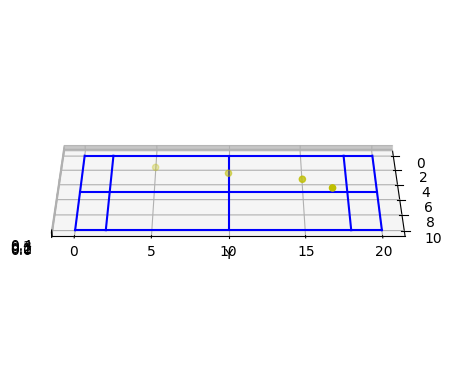

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


def plot_3d_points(
    x,
    y,
    z,
    plt_axis: None | Axes3D = None,
    view_init: tuple[float, float, float] = (90.0, 0.0, 0.0),
) -> Axes3D:
    if plt_axis is None:
        fig = plt.figure()
        plt_axis = fig.add_subplot(111, projection="3d")
    # plot the points
    plt_axis.scatter(x, y, z, c="y")
    # set the axis labels
    plt_axis.set_xlabel("X")
    plt_axis.set_ylabel("Y")
    plt_axis.set_zlabel("Z")
    plt_axis.set_aspect("equal")
    plt_axis.view_init(*view_init)
    return plt_axis


def plot_3d_lines(
    xs: np.array,
    ys: np.array,
    zs: np.array,
    plt_axis: None | Axes3D = None,
    view_init: tuple[float, float, float] = (90.0, 0.0, 0.0),
) -> Axes3D:
    """plots lines on a Axes3D

    Args:
        xs (np.array): array of x start and stop coordinates
        ys (np.array): array of y start and stop coordinates
        zs (np.array): array of z start and stop coordinates
        plt_axis (None | Axes3D, optional): Axes3D to draw on. If not given one will be created Defaults to None.
        view_init (tuple[float, float, float], optional): Position of the camera to view. Defaults to (90., 0., 0.).

    Returns:
        Axes3D: matplotlib ax that can be added to or shown.
    """

    if plt_axis is None:
        fig = plt.figure()
        plt_axis = fig.add_subplot(111, projection="3d")

    for i in range(len(xs)):
        plt_axis.plot(xs[i], ys[i], zs[i], c="b")
    # set the axis labels
    plt_axis.set_xlabel("X")
    plt_axis.set_ylabel("Y")
    plt_axis.set_zlabel("Z")
    plt_axis.set_aspect("equal")
    plt_axis.view_init(*view_init)
    return plt_axis


ax = plot_3d_lines(**convert_corners_to_lines(corners=corners_world_3d))

ball = np.array(
    [
        [
            2,
            3,
            4,
            5,
        ],
        [5, 10, 15, 17],
        [0.2, 0.3, 0.4, 0.3],
    ]
)
ax = plot_3d_points(ball[0], ball[1], ball[2], plt_axis=ax, view_init=(10, 40, 0))

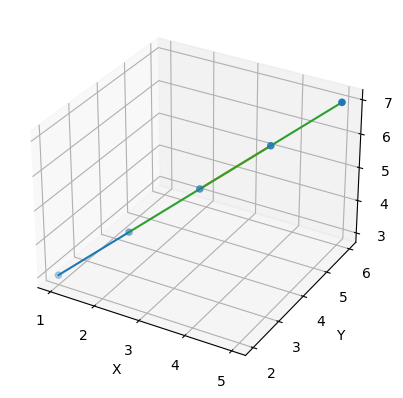

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

corners_world
# create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# define some 3D points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
z = np.array([3, 4, 5, 6, 7])

# plot the points
ax.scatter(x, y, z)

# define some 3D lines
xs = np.array([[1, 2], [3, 4], [2, 5]])
ys = np.array([[2, 3], [4, 5], [3, 6]])
zs = np.array([[3, 4], [5, 6], [4, 7]])

# plot the lines
for i in range(len(xs)):
    ax.plot(xs[i], ys[i], zs[i])

# set the axis labels
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# show the plot
plt.show()

In [26]:
type(ax)

mpl_toolkits.mplot3d.axes3d.Axes3D

In [20]:
corners_world = {
    "front_left": PadelCourt.front_left,
    "front_right": PadelCourt.front_right,
    "back_left": PadelCourt.back_left,
    "back_right": PadelCourt.back_right,
    "left_near_serve_line": PadelCourt.left_near_serve_line,
    "right_near_serve_line": PadelCourt.right_near_serve_line,
    "left_far_serve_line": PadelCourt.left_far_serve_line,
    "right_far_serve_line": PadelCourt.right_far_serve_line,
}
corners_world_3d = {
    "front_left": (*PadelCourt.front_left, 0.0),
    "front_right": (*PadelCourt.front_right, 0.0),
    "back_left": (*PadelCourt.back_left, 0.0),
    "back_right": (*PadelCourt.back_right, 0.0),
    "left_near_serve_line": (*PadelCourt.left_near_serve_line, 0.0),
    "right_near_serve_line": (*PadelCourt.right_near_serve_line, 0.0),
    "left_far_serve_line": (*PadelCourt.left_far_serve_line, 0.0),
    "right_far_serve_line": (*PadelCourt.right_far_serve_line, 0.0),
}
corners_world_n = {
    "front_left": PadelCourt.front_left_n,
    "front_right": PadelCourt.front_right_n,
    "back_left": PadelCourt.back_left_n,
    "back_right": PadelCourt.back_right_n,
    "left_near_serve_line": PadelCourt.left_near_serve_line_n,
    "right_near_serve_line": PadelCourt.right_near_serve_line_n,
    "left_far_serve_line": PadelCourt.left_far_serve_line_n,
    "right_far_serve_line": PadelCourt.right_far_serve_line_n,
}
corners_world_3d_n = {
    "front_left": (*PadelCourt.front_left_n, 0.0),
    "front_right": (*PadelCourt.front_right_n, 0.0),
    "back_left": (*PadelCourt.back_left_n, 0.0),
    "back_right": (*PadelCourt.back_right_n, 0.0),
    "left_near_serve_line": (*PadelCourt.left_near_serve_line_n, 0.0),
    "right_near_serve_line": (*PadelCourt.right_near_serve_line_n, 0.0),
    "left_far_serve_line": (*PadelCourt.left_far_serve_line_n, 0.0),
    "right_far_serve_line": (*PadelCourt.right_far_serve_line_n, 0.0),
}
corners_world_3d

{'front_left': (0.0, 800.0, 0.0),
 'front_right': (400.0, 800.0, 0.0),
 'back_left': (0.0, 0.0, 0.0),
 'back_right': (400.0, 0.0, 0.0),
 'left_near_serve_line': (0.0, 720.0, 0.0),
 'right_near_serve_line': (400.0, 720.0, 0.0),
 'left_far_serve_line': (0.0, 80.0, 0.0),
 'right_far_serve_line': (400.0, 80.0, 0.0)}

In [21]:
from matplotlib import pyplot as plt

corners_image = {
    "front_left": ((11.11111111111111 / 100.0), (87.90123456790124 / 100.0)),
    "front_right": ((89.44444444444444 / 100.0), (88.64197530864197 / 100.0)),
    "back_left": ((31.38888888888889 / 100.0), (29.135802469135804 / 100.0)),
    "back_right": ((69.16666666666667 / 100.0), (29.382716049382715 / 100.0)),
    "left_near_serve_line": ((16.61237785016286 / 100.0), (72.58687258687259 / 100.0)),
    "right_near_serve_line": ((84.14766558089035 / 100.0), (72.77992277992279 / 100.0)),
    "left_far_serve_line": ((29.641693811074916 / 100.0), (34.36293436293436 / 100.0)),
    "right_far_serve_line": ((70.96774193548387 / 100.0), (34.387351778656125 / 100.0)),
}

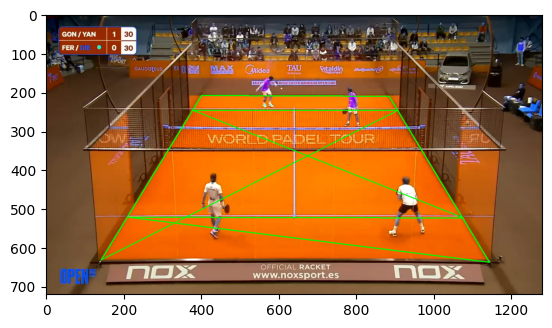

In [22]:
import cv2
import numpy as np

# Load the input image
img = cv2.imread(
    "/Users/benjamindecharmoy/projects/courtvision/data/frames/curated_001/frame_0001.png"
)
height, width, _ = img.shape
# Define the source and destination coordinates
src_coords = np.array(
    [
        (
            corners_image["front_left"][0] * width,
            corners_image["front_left"][1] * height,
        ),
        (corners_image["back_left"][0] * width, corners_image["back_left"][1] * height),
        (
            corners_image["back_right"][0] * width,
            corners_image["back_right"][1] * height,
        ),
        (
            corners_image["front_right"][0] * width,
            corners_image["front_right"][1] * height,
        ),
        (
            corners_image["left_near_serve_line"][0] * width,
            corners_image["left_near_serve_line"][1] * height,
        ),
        (
            corners_image["right_near_serve_line"][0] * width,
            corners_image["right_near_serve_line"][1] * height,
        ),
        (
            corners_image["left_far_serve_line"][0] * width,
            corners_image["left_far_serve_line"][1] * height,
        ),
        (
            corners_image["right_far_serve_line"][0] * width,
            corners_image["right_far_serve_line"][1] * height,
        ),
    ],
    dtype=np.float32,
)
src_coords_norm = np.array(
    [
        (corners_image["front_left"][0], corners_image["front_left"][1]),
        (corners_image["back_left"][0], corners_image["back_left"][1]),
        (corners_image["back_right"][0], corners_image["back_right"][1]),
        (corners_image["front_right"][0], corners_image["front_right"][1]),
        (
            corners_image["left_near_serve_line"][0],
            corners_image["left_near_serve_line"][1],
        ),
        (
            corners_image["right_near_serve_line"][0],
            corners_image["right_near_serve_line"][1],
        ),
        (
            corners_image["left_far_serve_line"][0],
            corners_image["left_far_serve_line"][1],
        ),
        (
            corners_image["right_far_serve_line"][0],
            corners_image["right_far_serve_line"][1],
        ),
    ],
    dtype=np.float32,
)
dst_coords = np.array(
    [
        corners_world["front_left"],
        corners_world["back_left"],
        corners_world["back_right"],
        corners_world["front_right"],
        corners_world["left_near_serve_line"],
        corners_world["right_near_serve_line"],
        corners_world["left_far_serve_line"],
        corners_world["right_far_serve_line"],
    ],
    dtype=np.float32,
)

dst_coords_norm = np.array(
    [
        corners_world_n["front_left"],
        corners_world_n["back_left"],
        corners_world_n["back_right"],
        corners_world_n["front_right"],
        corners_world_n["left_near_serve_line"],
        corners_world_n["right_near_serve_line"],
        corners_world_n["left_far_serve_line"],
        corners_world_n["right_far_serve_line"],
    ],
    dtype=np.float32,
)
dst_coords, dst_coords_norm
plot_coords(img=img, src_coords=src_coords)

In [23]:
corners_image

{'front_left': (0.1111111111111111, 0.8790123456790124),
 'front_right': (0.8944444444444444, 0.8864197530864197),
 'back_left': (0.3138888888888889, 0.291358024691358),
 'back_right': (0.6916666666666668, 0.2938271604938272),
 'left_near_serve_line': (0.16612377850162863, 0.7258687258687259),
 'right_near_serve_line': (0.8414766558089035, 0.7277992277992279),
 'left_far_serve_line': (0.29641693811074915, 0.3436293436293436),
 'right_far_serve_line': (0.7096774193548387, 0.3438735177865613)}

Intrinsic matrix:
 [[1.00994393e+04 0.00000000e+00 3.59513241e+02]
 [0.00000000e+00 6.40163859e+02 6.39625160e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients:
 [[-1.46055044  0.61010796 -0.30774318 -0.01096026 -0.07325427]]


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

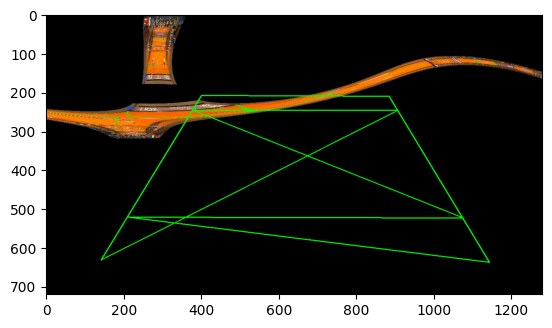

In [24]:
import cv2
import numpy as np

# Define object points in 3D space
# object_points = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0], [0, 1, 0]], dtype=np.float32)
dst_coords_3d = np.array(
    [
        corners_world_3d["front_left"],
        corners_world_3d["back_left"],
        corners_world_3d["back_right"],
        corners_world_3d["front_right"],
        corners_world_3d["left_near_serve_line"],
        corners_world_3d["right_near_serve_line"],
        corners_world_3d["left_far_serve_line"],
        corners_world_3d["right_far_serve_line"],
    ],
    dtype=np.float32,
)

src_coords
# Load images and detect corners
# image_points = []
# for i in range(num_images):
#     image = cv2.imread(f'image_{i}.jpg')
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     ret, corners = cv2.findChessboardCorners(gray, (7,7), None)
#     if ret:
#         image_points.append(corners)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Compute intrinsic matrix and distortion coefficients
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    [dst_coords_3d], [src_coords_norm], img.shape[:2], None, None
)

# Print intrinsic matrix and distortion coefficients
print("Intrinsic matrix:\n", mtx)
print("Distortion coefficients:\n", dist)

import cv2
import numpy as np


def undistort_image(image, intrinsic_matrix, distortion_coeffs):
    # Compute optimal camera matrix
    width, height = image.shape[:2]
    new_camera_matrix, roi = cv2.getOptimalNewCameraMatrix(
        intrinsic_matrix, distortion_coeffs, (width, height), 1, (width, height)
    )

    # Undistort image
    undistorted_image = cv2.undistort(
        image, intrinsic_matrix, distortion_coeffs, None, new_camera_matrix
    )

    # Crop image to remove black border
    x, y, w, h = roi
    # undistorted_image = undistorted_image[y:y+h, x:x+w]

    return undistorted_image


und_img = undistort_image(image=img, intrinsic_matrix=mtx, distortion_coeffs=dist)
plot_coords(img=und_img, src_coords=src_coords)
und_img

In [ ]:
und_img = undistort_image(image=img, intrinsic_matrix=mtx, distortion_coeffs=dist)
plot_coords(img=und_img, src_coords=src_coords)

In [28]:
# compute perspective transform
import kornia as K
import torch

points_src_norm = torch.tensor(src_coords_norm)
points_dst_norm = torch.tensor(dst_coords_norm)
points_src = torch.tensor(src_coords)
points_dst = torch.tensor(dst_coords)

points_dst_norm.shape

torch.Size([8, 2])

In [29]:
# points_src/points_src.max()
t_img = K.utils.image_to_tensor(img).float().unsqueeze(0)
t_img.shape
# points_src.shape

torch.Size([1, 3, 720, 1280])

In [46]:
# M: torch.tensor = K.geometry.get_perspective_transform(points_src, points_dst)
from kornia.geometry.transform.imgwarp import homography_warp

m_homography = K.geometry.ransac.RANSAC()
H, d = m_homography(points_dst_norm, points_src_norm)
warped = homography_warp(
    patch_src=t_img,
    src_homo_dst=H.unsqueeze(0),
    dsize=(width, height),
    align_corners=True,
    normalized_coordinates=True,
    normalized_homography=True,
)
H, d

(tensor([[ 0.3881, -0.2509,  0.3068],
         [-0.0020,  0.1283,  0.3137],
         [-0.0064, -0.4971,  1.0000]]),
 tensor([True, True, True, True, True, True, True, True]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


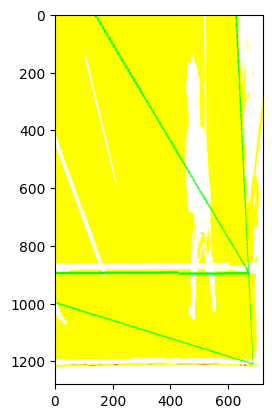

In [47]:
# warped = warper(t_img, H.unsqueeze(0))
plt.imshow(K.tensor_to_image(warped))

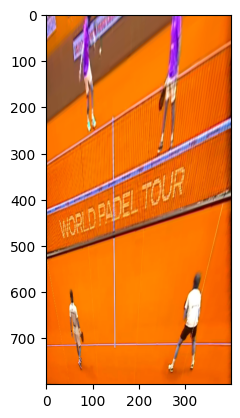

In [71]:
# # warp the original image by the found transform
# img_warp: torch.tensor = K.geometry.warp_perspective(img.float(), M, dsize=(h, w))

# Find the homography matrix
H, _ = cv2.findHomography(src_coords, dst_coords, method=cv2.RANSAC, maxIters=1000)

# Apply the homography matrix to the input image
output_size = (
    int(PadelCourt.width),
    int(PadelCourt.length),
)  # The size of the output image
output = cv2.warpPerspective(img, H, output_size)

# Display the output image
plt.imshow(output)
# cv2.imshow('Output', output)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

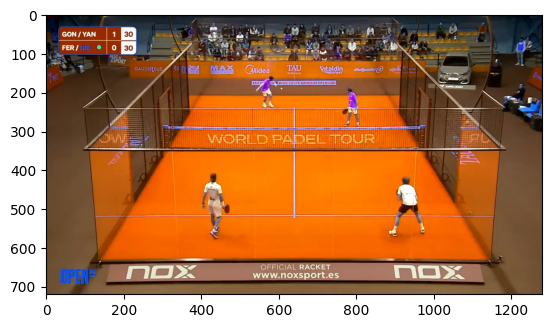

In [73]:
plt.imshow(img)

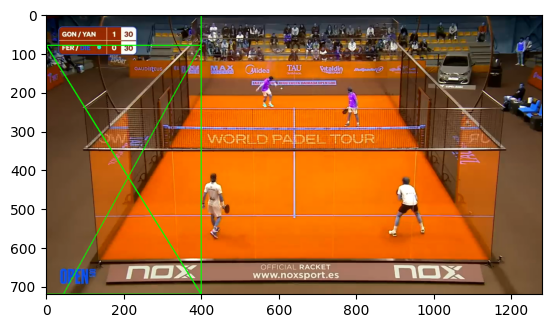

In [74]:
def plot_coords(img: np.array, src_coords: np.array, show: bool = True):
    src_coords = src_coords.astype(int)
    cv2.polylines(img, [src_coords], True, (0, 255, 0), thickness=2)
    plt.imshow(img)


plot_coords(img=img, src_coords=dst_coords)

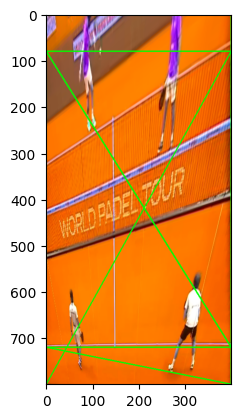

In [75]:
plot_coords(output, dst_coords)

In [15]:
PadelCourt.center_line.shape

(2, 1, 2)

In [16]:
cv2.polylines(output, [PadelCourt.center_line], True, (0, 255, 0), thickness=2)
cv2.polylines(output, [PadelCourt.net_line], True, (0, 255, 0), thickness=2)
cv2.polylines(output, [PadelCourt.near_serve_line], True, (0, 255, 0), thickness=2)
cv2.polylines(output, [PadelCourt.far_serve_line], True, (0, 255, 0), thickness=2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [186, 166, 217],
        ...,
        [209,  83,   0],
        [209,  82,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [203,  75,   0],
        [197,  71,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [191,  71,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [17]:
dst_coords

array([[  0., 800.],
       [  0.,   0.],
       [400.,   0.],
       [400., 800.],
       [  0., 720.],
       [400., 720.],
       [  0.,  80.],
       [400.,  80.]], dtype=float32)

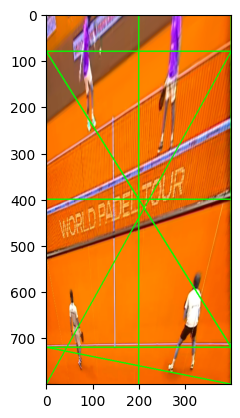

In [18]:
plt.imshow(output)

In [166]:
PadelCourt.far_serve_line

array([[[  0,   2]],

       [[400,   2]]], dtype=int32)

In [49]:
import cv2
import numpy as np

# Define the 2D and 3D coordinates
image_points = np.array([(10, 20), (100, 50), (30, 200)], dtype=np.float32)
world_points = np.array([(0, 0, 0), (1, 0, 0), (0, 1, 0)], dtype=np.float32)

# Compute the camera matrix
_, rvec, tvec = cv2.solvePnP(
    world_points, image_points, np.eye(3, dtype=np.float32), None
)
rot_mat, _ = cv2.Rodrigues(rvec)
cam_mat = np.hstack((rot_mat, tvec))

# Define the image to be placed on the plane
img = cv2.imread("image.jpg")

# Compute the perspective transformation
rows, cols, _ = img.shape
persp_mat = cv2.getPerspectiveTransform(
    np.array(
        [(0, 0), (cols - 1, 0), (0, rows - 1), (cols - 1, rows - 1)], dtype=np.float32
    ),
    cam_mat.dot(world_points.T).T[:, :2],
)

# Apply the perspective transformation and place the image on the plane
result = cv2.warpPerspective(img, persp_mat, (cols, rows))

error: OpenCV(4.7.0) /Users/xperience/GHA-OCV-Python/_work/opencv-python/opencv-python/opencv/modules/calib3d/src/solvepnp.cpp:840: error: (-215:Assertion failed) ( (npoints >= 4) || (npoints == 3 && flags == SOLVEPNP_ITERATIVE && useExtrinsicGuess) || (npoints >= 3 && flags == SOLVEPNP_SQPNP) ) && npoints == std::max(ipoints.checkVector(2, CV_32F), ipoints.checkVector(2, CV_64F)) in function 'solvePnPGeneric'
